# Chapter 10

- 인공 신경망 : 뇌에 있는 생물학적 뉴런의 네트워크에서 영감을 받은 머신러닝 모델
    - 딥러닝의 핵심
    - 대규모 머신러닝 문제를 다루는 데에 좋음
- 생물학적 뉴런에서 영감을 받았다고 해서 생물학적 시스템에 국한되지 않는 것이 좋음

## 1. 생물학적 뉴런

- 생물학적 뉴런 하나는 아주 단순하게 동작하지만, 보통은 수십억 개로 구성된 거대한 네트워크로 조직. 이 네트워크가 다시 다른 뉴런 네트워크 수천 개와 연결
- 생물학적 뉴런 동작
    - 신경전달물질이 뉴런에 전달, 뉴런이 신호가 발생, 이 신호가 축삭돌기를 따라 이동하여 시냅스에서 화학적 신호가 발생

<img src=attachment:image.png width=600>
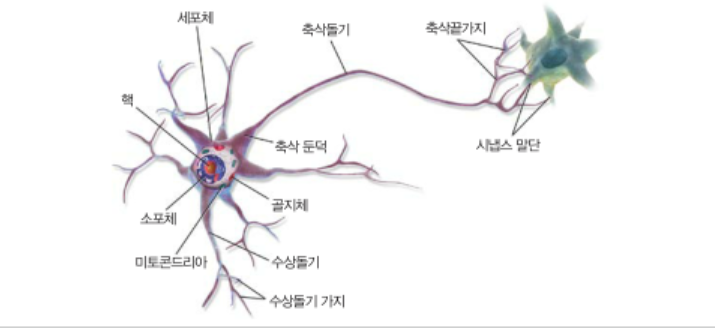

## 2. 뉴런을 사용한 논리 연산
- 매우 단순한 신경망 모델 : 어떠한 명제도 계산할 수 있음
    - 하나 이상의 이진 입력과 이진 출력을 가지는 모델
    - 후에 이것이 인공 뉴런이 됨
        1. C=A(A가 활성화되면, C가 활성화)
        2. C=AxB(AadB가 활성화되면, C가 활성화)
        3. C=A+B(AorB가 활성화되면, C가 활성화)
        4. C-A+notB(A가 활성화되고, B가 비활성화될 때, C가 활성화, A가 항상 활성화되어 있다면 이 네트워크는 논리 부정 연산)
            - *x는 논리곱, +는 논리합*

<img src = attachment:image.png width=600>
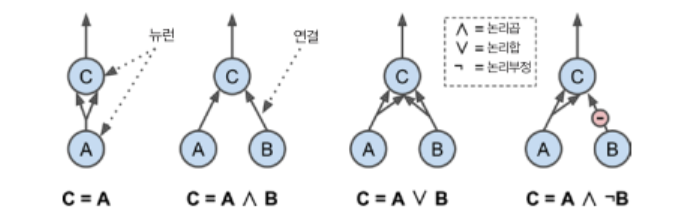

## 3. 퍼셉트론
- 가장 간단한 인공 신경망 구조 중 하나
- 각 인공뉴런의 입력과 출력이 이진이 아닌 어떤 숫자이고, 각각의 입력 연결은 가중치와 연관
- $X^{T}W$한 뒤 계산된 합에 계단함수를 적용하여 결과를 출력
- $h_{w}(x)=step(z), z=X^{T}W$

#### 계단함수
- 임계값은 임의로 0으로 지정
- $heaviside(z) = 0(z<0), 1(z>=0)$(*가장 많이 사용됨*)
- $sgn(z) = -1(z<0), 0(z=0), 1(z>1)$

#### 완전 연결층/밀집층
- 한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있는 층

## 3-1. 퍼셉트론 구조
- *3개의 class로 구분하는 multioutput classifier*
- 입력뉴런 : 입력을 그대로 통과하는 뉴런
- 편향뉴런 : 항상 1을 출력하는 뉴런
<img src = attachment:image.png width=300>
- 완전연결층(출력층)의 출력 계산
- $h_{w,b} = \phi(XW+b)$
    - $X$ : 입력특성의 행렬, 행은 각 샘플, 열을 각 특성
    - $W$ : 편향 뉴런을 제외한 모든 연결 가중치, 행수는 입력 뉴런과 대응, 열은 출력층에 있는 인공 뉴런과 대응
    - $b$ : 편향 뉴런과 인공 뉴런 사이의 모든 연결 가중치, 인공뉴런마다 하나의 편향 값을 가짐
    - $\phi$ : 활성화함수
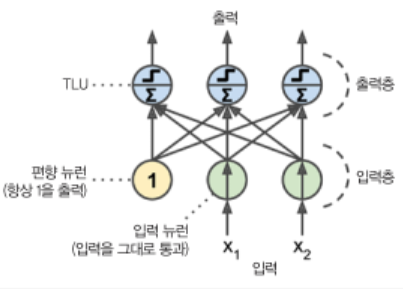

## 3-2. 퍼셉트론의 훈련

- 헤브의 규칙
    - 생물할적 뉴런이 다른 뉴런을 활성화시킬 때 두 뉴런의 연결이 더 강해짐
    - 서로 활성화되는 세포가 서로 연결됨
- 퍼셉트론 학습 규칙
    - $w_{i,j}^{next step} = w_{i,j}+\lambda(y_{i}-\hat{y}_{j})x_{i}$
- 퍼셉트론 수렴 이론 : 퍼셉트론은 class가 선형으로 구분 가능하다면 정답에 수렴.
- logistic regression 과 달리 클래스 확률이 아닌 고정된 임계값을 기준으로 예측을 만듦

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)] # 꽃잎의 길이와 너비
y = (iris.target ==0).astype(np.int) # 부채붓꽃 인가?

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict(X)

In [8]:
print(sum(y==y_pred)/y.shape[0])

1.0


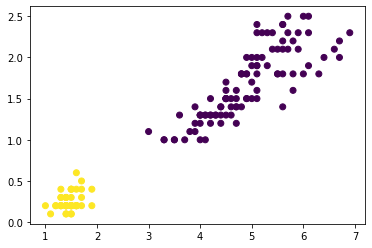

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y)

## 3.3 퍼셉트론의 한계
- 선형분류모형이기 때문에 XOR문제와 같은 문제들을 풀 수 없는 제약

## 4. 다중퍼셉트론(MLP)
- 퍼셉트론을 여러 개 쌓아올린 모형
- 다중 퍼셉트론은 선형회귀모형과는 달리 비선형문제(XOR)과 같은 제약들을 일부 해결할 수 있음

## 4.1 MLP와 역전파
- 다중 퍼셉트론은 **입력층**과 **은닉층**, **출력층**으로 구성됨.
- 은닉층을 여러 개 쌓아올린 인공신경망을 심층신경망(DNN)이라고 함
- DNN을 연구하는 분야 -> 딥러닝

#### 역전파 훈련 알고리즘
- 효율적인 기법으로 gradient를 자동으로 계산
- 네트워크를 정방향으로 한 번, 역방향으로 한 번 통과함으로써 모든 모델 파라미터에 대한 네트워크 오차의 gradient를 계산 가능
- gradient를 구한 후에는 gradient descent 수행
- 정방향
    - 각 훈련 샘플에 대한 예측을 만듦
    - 오차를 측정
- 역방향
    - 각 gradient를 계산
    - 파라미터 update

## 4.2 활성화 함수
- 역전파가 용이하도록 활성화 함수를 계단함수에서 다른 것으로 바꾸기 시작
- **활성화 함수의 필요성**
    - 선형함수만으로 층을 구성하게 되면 아무리 층을 쌓더라도 결국 하나의 선형함수와 동일
    - 복잡한 문제를 풀 수 없음(XOR 포함)

- 활성화 함수
    - sigmoid
        - $sigmoid(z) 1/(1+exp(-z))$
        - 출력범위 : 0~1
    - tanh
        - $tanh(z) = (2z)-1$
        - 출력범위 : -1~1
    - Relu
        - $ReLU(z) = max(0,z)$(*0에서는 미분불가능 -> gradient =0사용*)
        - 출력범위 : 0~$\infty$(*범위의 제한이 없어서 gradient 손실 문제를 완화해줌*)

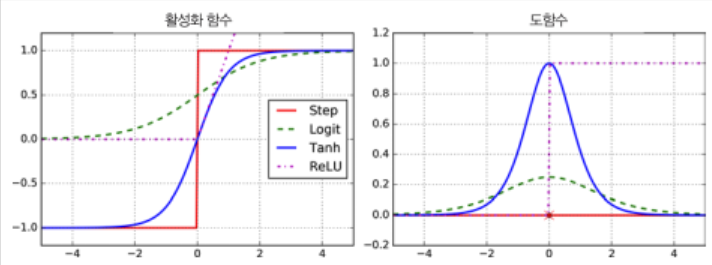

## 4.3 회귀에서의 MLP
- 값하나를 예측하는 경우 -> 출력 뉴런이 하나만 필요
- 다변량 회귀모델 -> 출력 뉴런이 여러개 필요

- **활성화함수(종속변수에서의 제한이 있는 경우)**
    - ReLU/softplus : 출력이 0 혹은 양수인 경우
        - softplus : $softplus(z) = log(1+exp(z))$
            - z가 음수일 때 0에 가까워지고 큰 양수일수록 z에 가까워짐
    - tanh/sigmoid : 어떤 번위 안의 값을 예측하는 경우

- **loss 함수**
    - MSE(평균제곱오차) : 일반적인 경우
    - MAP(평균절댓값오차) : 데이터에 이상치가 많은 경우
    - Huber : 오차가 임계값(전형적으로 1)보다 작으면 MSE, 크면 MAP

- **regression 종류**
    - 독립변수
        - 독립변수가 한개 -> 단순(simple regression)
        - 독립변수가 여러개 -> 다중(multiple regression)
    - 종속변수
        - 종속변수가 한개 -> 단변량(univariate regression)
        - 종속변수가 여러개 -> 다변량(multivariate regression)

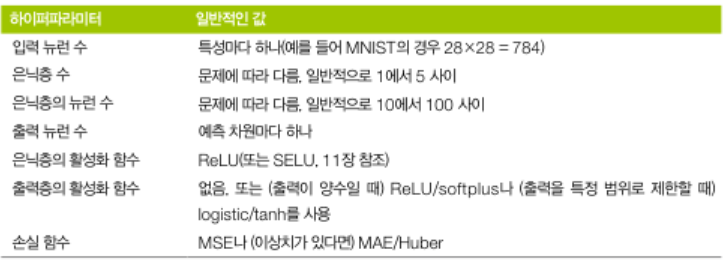

## 4.4 분류를 위한 MLP
- 이진분류 클래스의 경우 하나의 출력 뉴런만이 필요
- 다중분류의 경우 클래스마다 하나의 출력 뉴런이 필요

- **활성화함수**
    - softmax
- **loss 함수**
    - cross-entropy-loss

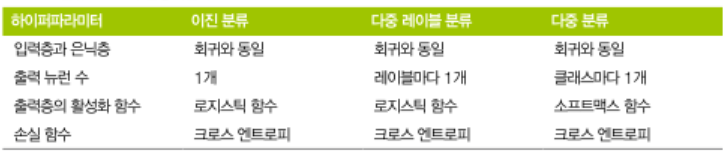

## 5. tf2를 이용한 MLP 구현
- tf.keras.layers.Sequential()
- tf.keras.layers.Flatten()
- tf.keras.layers.Dense()
- name을 통해 각 층의 이름을 지정할 수도 있음
- 초기화
    - kernel_initializer
    - bias_initializer

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__) # 텐서플로우의 자체적인 keras

2.3.1
2.4.0


## 5.1 이미지 분류기 만들기

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [83]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [3]:
# train set과 마찬가지로 valid set, test set에 대해서도 전처리 해주어야 함
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [4]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal",
              "Shirt","Snearker","Bag","Ankle boot"]
class_names[y_train[0]]

'Coat'

### Sequential API를 이용한 신경망 모델
- 순서대로 연결된 층을 일렬로 쌓아서 모델을 구성
- 입력 크기를 안다면 지정해주는 것이 좋음
    - 만약 모른다면 실제 모델이 build될 때까지 가중치행렬이 만들어지지 않음
        - summary 메서드 호출/모델 저장 등의 특정 작업 수행이 X
- 실제 데이터를 주입할 때 혹은 build()메서드를 호출할 때 모델이 빌드 됨.

1. sequential model 생성
2. 첫번째 층 -> Flatten
    - 입력 이미지를 1D 배열로 변환, 입력 데이터 X를 받아서 X.reshape(-1,1)로 변환하는 전처리 수행
    - input_shape 지정을 통해 입력 데이터의 형태를 지정해야 함
3. 뉴런 300개를 가진 Dense 은닉층 추가. ReLU 활성화 함수 이용
4. 뉴런 100개를 가진 Dense 은닉층 추가. ReLU 활성화 함수 이용
5. 10개의 class의 출력층 추가, softmax 이용

#### 층을 하나씩 추가

In [5]:
# sequential model 선언
model = keras.models.Sequential()
# 첫번째 층을 모델에 추가
model.add(keras.layers.Flatten(input_shape=[28,28]))
# 은닉층 추가 
model.add(keras.layers.Dense(300, activation = "relu"))
# 은닉층 추가
model.add(keras.layers.Dense(100, activation = "relu"))
# 출력층 추가
model.add(keras.layers.Dense(10, activation = "softmax"))

- binary classification이라면 출력층의 activation function으로 softmax 대신 **sigmoid** 사용

#### 층의 리스트를 전달

In [119]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = "relu", name = "hidden1"),
    keras.layers.Dense(100, activation = "relu", name = "hidden2"),
    keras.layers.Dense(10, activation = "softmax", name = "output")
])

In [6]:
model.summary()
# hidden1에서는 784*300 + 300 = 235500
# hidden2에서는 300*100 + 100 = 30100
# output에서는 100*!0 + 10 = 1010

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.layers

In [39]:
hidden1 = model.layers[1] # 인덱스로 층을 선택
hidden1.name

'hidden1'

In [41]:
model.get_layer("hidden1") # 이름으로 층을 선택

In [42]:
weights, biases = hidden1.get_weights() # 파라미터 접근

In [46]:
print(weights) # 초기화되어있는 weights
weights.shape
print(biases) # 0으로 초기화

[[-0.04965359  0.05648747  0.01114824 ...  0.07244132 -0.00535756
  -0.04789047]
 [-0.00933458  0.01530741 -0.0229467  ...  0.02216948  0.05641647
  -0.03108884]
 [-0.01845108  0.02494077  0.04212671 ...  0.04510305  0.05916145
   0.04839855]
 ...
 [-0.00699746  0.04832651  0.07075261 ...  0.00791132 -0.06734096
   0.02631927]
 [-0.02425029  0.05917551 -0.03155293 ... -0.00833775  0.0010917
   0.01337163]
 [-0.0670924  -0.04347326 -0.0533964  ... -0.06066816  0.04170826
   0.03177733]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

### 모델 컴파일
- 손실함수와 optimizer를 지정
- target 데이터에 따른 손실함수
    - one-hot-vector : categorical_crossentropy
    - label data : sparse_categorical_crossentropy
    - binary data : sigmoid, binary_crossentropy
- *타겟 테이터 변환 방법*
    - label -> one-hot : keras.utils.to_categorical()
    - one-hot -> label : np.argmax()
- optimizer
    - keras.optimizers.SGD(lr=) 등 존재
- metrics
    - 분류 -> accuracy 등
    - 회귀 -> rmse 등

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "sgd", # learning rate는 0.01을 사용
             metrics=["accuracy"])

In [110]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = keras.optimizers.SGD(lr=0.01),
             metrics=["accuracy"])

### 모델 훈련
- epoch : default=1
- validation_data : 선택사항
    - 방법1 : 직접 데이터셋을 할당
    - 방법2 : 0~1 사이의 실수 전달
        - 섞기 전의 데이터의 마지막 10%를 검증 데이터셋으로 사용
    - validation data를 통해 overfitting등 모델이 얼마나 잘 수행되는지 확인 가능
- batch_size : default = 32
    - 1로 지정 : SGD
    - 전체 데이터 개수 : 완전 배치

- 처리한 샘플(배치) 개수, 샘플마다 걸린 평균 훈련 시간, 훈련 세트와 검증 세트에 대한 손실과 정확도를 출력

- fit 메서드를 다시 호출하면 중지되었던 곳에서부터 훈련을 이어갈 수 있음 

In [38]:
history = model.fit(x=X_train, y=y_train, epochs=30, batch_size = 100,
                   validation_data = (X_valid, y_valid))

Epoch 1/30
550/550 [==============================] - 2s 4ms/step - loss: 0.1702 - accuracy: 0.9393 - val_loss: 0.2741 - val_accuracy: 0.8992
Epoch 2/30
550/550 [==============================] - 2s 4ms/step - loss: 0.1688 - accuracy: 0.9396 - val_loss: 0.2772 - val_accuracy: 0.9010
Epoch 3/30
550/550 [==============================] - 2s 4ms/step - loss: 0.1679 - accuracy: 0.9405 - val_loss: 0.2757 - val_accuracy: 0.9000
Epoch 4/30
550/550 [==============================] - 2s 4ms/step - loss: 0.1670 - accuracy: 0.9403 - val_loss: 0.2783 - val_accuracy: 0.8988
Epoch 5/30
550/550 [==============================] - 2s 4ms/step - loss: 0.1662 - accuracy: 0.9404 - val_loss: 0.2763 - val_accuracy: 0.9012
Epoch 6/30
550/550 [==============================] - 2s 4ms/step - loss: 0.1653 - accuracy: 0.9405 - val_loss: 0.2758 - val_accuracy: 0.9012
Epoch 7/30
550/550 [==============================] - 2s 4ms/step - loss: 0.1646 - accuracy: 0.9414 - val_loss: 0.2764 - val_accuracy: 0.9002
Epoch 

#### 불균형한 데이터셋일 경우
- 만약 데이터셋이 불균형하다면, 많이 등장하는 class에 치우쳐서 많이 등장하는 class로 예측 결과가 치우치게 됨.(즉 많이 등장하는 class로 예측하는 성향이 강해짐)
- fit 매개변수 : class weight
    - class weight는 적게 등장하는 클래스에 높은 가중치를, 많이 등장하는 클래스에 낮은 가중치를 부여함으로써 손실을 계한할 때 이를 반영. -> 많이 등장하는 클래스에 예측 결과가 치우치지 않도록 조정
- fit 매개변수 : sample_weight 
    - 샘플별 가중치 : 만약 어떤 샘플은 전문가에 의해 할당되고, 다른 샘플은 크라우드소싱 플랫폼을 사용하여 레이블이 할당되었다면 전자에 더 높은 가중치를 둔 샘플별 가중치를 사용할 수 있음

- class_weight와 sample_weight가 모두 지정되면, 이 두 값을 곱해서 사용
    - loss의 경우 가중치를 곱하고 전체 데이터셋의 개수로 나눔
    - 평가지표의 경우 가중치를 곱하고 전체 가중치의 합으로 나눔(기본 : 1)

### 평가

In [25]:
import numpy as np

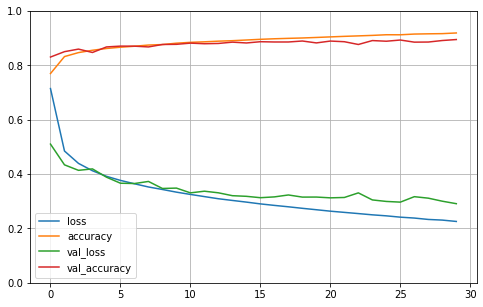

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 에포크가 끝날 때 마다의 train, valid set의 loss, 평가 지표
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True) # grid를 생성
plt.gca().set_ylim(0,1) # 수직출의 범위를 0~1 사이로 설정
plt.show()

- 훈련세트는 에포크가 진행되는 동안 손실, 정확도가 계산되지만, 검증세트는 에포크가 끝난 후마다 계산됨. 정확히 하려면 훈련집합의 그래프를 에포크의 절반만큼 왼쪽으로 이동시켜야 함
    - 에포크 0의 train 성능 : 에포크0이 진행되는 동안 계산된 것
    - 에포크 0의 valid 성능 : 에포크0이 완료된 후 계산된 것
- 따라서 초기에 훈련집합보다 검증세트가 성능이 더 좋은 것처럼 보일 수 있음

- 훈련집합의 성능이 검증집합의 성능보다 너무 높다면 overfitting의 우려
    - 일반적으로 훈련이 훈련집합에 맞춰서 진행되기 때문에 나중에는 훈련집합의 성능이 검증집합의 성능보다 좋아짐
- 검증집합의 성능이 여전히 좋아진다면 underfitting

In [97]:
history.history

{'loss': [0.2146887183189392,
  0.21036142110824585,
  0.20713159441947937,
  0.20476941764354706,
  0.20166006684303284,
  0.19798775017261505,
  0.19527031481266022,
  0.19183309376239777,
  0.18968480825424194,
  0.18615025281906128,
  0.18295791745185852,
  0.18055744469165802,
  0.17747430503368378,
  0.17476032674312592,
  0.17260661721229553,
  0.16864921152591705,
  0.16505293548107147,
  0.1639096438884735,
  0.16226589679718018,
  0.1585158407688141,
  0.15748541057109833,
  0.15334610641002655,
  0.1514284759759903,
  0.14884081482887268,
  0.1462121158838272,
  0.14457881450653076,
  0.14222955703735352,
  0.14026537537574768,
  0.13738636672496796,
  0.13591381907463074],
 'accuracy': [0.9217636585235596,
  0.925636351108551,
  0.925636351108551,
  0.9259818196296692,
  0.927545428276062,
  0.928745448589325,
  0.9295818209648132,
  0.9313636422157288,
  0.9323272705078125,
  0.9336545467376709,
  0.9344545602798462,
  0.9347272515296936,
  0.9363090991973877,
  0.93747270

### test set
- evaluate는 batch_size와 sample weight와 같은 매개변수도 지원
    - batch_size default : 32
- 훈련도 sample weight/class weight에 따라 할 수 있고, 최종 평가도 sample weight에 따라 할 수 있음
- 훈련집합에서 지정한 batch_size / sample weight를 그대로 따라가지 않음

- 하이퍼파라미터 튜닝이 valid set을 통해서 이루어지기 때문에 test set이 valid set보다 성능이 조금 낮을 수 있음 -> cross-validation을 통해서 하이퍼 파라미터 튜닝을 해줄 수 있음

- test set을 통해 하이퍼 파라미터 튜닝을 하지 말아야 함
    - 일반화 오차를 매우 낙관적으로 추정하게 되기 때문

In [39]:
# fit할 때 설정한 loss와 평가지표에 의해 evaulate진행
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.8977


[0.31554868817329407, 0.8977000117301941]

### 모델을 사용해 예측을 만들기
- sklearn과 달리 predict로 클래스 라벨을 직접 주지 않고, 확률을 줌
- 즉 tf2의 predict 는 sklearn의 predict_proba와 같음
- tf2의 predict_classes -> sklearn의 predict

In [45]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.999],
       [0.   , 0.   , 0.999, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [51]:
y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

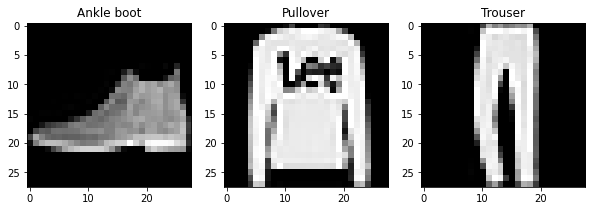

In [61]:
plt.figure(figsize = (10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(X_new[i], cmap="gray")
    plt.title(np.array(class_names)[y_pred[i]])

In [55]:
X_new[0].shape

(28, 28)

## 시퀀셜 API를 이용한 회귀용 MLP
- 분류 모델과의 차이점
    - output layer에서의 활성화 함수가 존재하지 않음
        - hidden layer에서는 활성화함수를 적용하지 않으면 선형회귀를 한 것과 동일하기 때문에 비선형 activation function을 사용하는 것이 필요(주로 relu)
    - loss : mse

In [70]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full, y_train_full)

# 훈련집합에 맞게 fit 해준 후 fit한 scaler으로 valid와 test set에 대해서 normalization 진행
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test)

In [68]:
X_train.shape[1:]

(8,)

- input_shape는 튜플이나 리스트 형태로 [,]형태로 들어가 주어야 함
    - [28,28] / [8,]

- **이상치** : 다른 데이터와는 다른 양상을 띄는 데이터, 관심을 가져야할 데이터
    - 이상치에 overfitting이 일어나지 않게 주의
    - loss를 mse가 아닌 mae를 쓰는 등의 노력이 필요
- **노이즈** : 측정 과정에서 노이즈가 포함되어 실제값과 다른 측정값을 얻게 되는 것. 노이즈가 심한 데이터는 제거해야할 대상. 노이즈를 줄이기 위해 노력하여야 함
    - 노이즈가 많은 데이터는 overfitting이 일어나지 않게 하기 위해 노력해야 함

- 노이즈가 낀 데이터

![image.png](attachment:image.png)

In [71]:
# overfitting을 방지하기 위해 얕은 layer층
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer = "sgd")
history = model.fit(X_train, y_train, epochs = 20,
                   validation_data = (X_valid,y_valid))

# fit시에 지정한 loss와 평가지표에 의해 evaluate
mse_test = model.evaluate(X_test,y_test)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2174 - val_loss: 0.6047
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5074 - val_loss: 0.4730
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4623 - val_loss: 0.7578
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4571 - val_loss: 0.4231
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4226 - val_loss: 0.4094
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4145 - val_loss: 0.3972
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4037 - val_loss: 0.3920
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3920 - val_loss: 0.3828
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3868 - val_loss: 0.3793
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3842 - val_loss: 0.3745

In [72]:
mse_test

0.34995096921920776

In [73]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [83]:
print(y_pred.reshape(3,))
print(y_test[:3])

[3.1105127  0.618883   0.73767024]
[3.819 0.801 0.575]
